## Análisis de ventas con python

Descargue el excel llamado ventas.xlsx del foro, el excel 
contiene datos de ventas de todo el año.
Realice las siguientes tareas:

1. Obtenga gráfica de ventas totales por mes

2. Determine que vendedor es el que obtuvo más ventas 
en todo el año y de ese vendedor grafique las ventas 
por mes en el año

3. Separe los datos de ventas de cada mes y por cada 
mes genere un nuevo archivo excel, el excel nuevo 
contendrá las ventas solo de ese mes

Cargamos las librerias necesarias para este proyecto

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Cargamos y procesamos el csv, en el siguiente código se describe cada uno de los pasos realizados

In [2]:
# Configurar el formateador para mostrar números completos (no exponenciales) en el eje Y
formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)

#leemos el excel (recuerda cambiar la carpeta contenedora)
dataframe = pd.read_excel(r"E:\Maestria y Diplomados\DIPLOMADO PYTHON\Full info\Modulo 6 aplicaciones de python en machine learning y ciencia de datos\Clase 2\ventas.xlsx", "datos")
dataframe.dropna(inplace = True) #Elimina nulos
dataframe = dataframe.drop_duplicates() #Elimina duplicados

Separamos los datos que seran utilizados para cubrir el punto 1, graficar las ventas totales

In [3]:
#separamos en otra columna el mes, para poder sacar totales por mes
dataframe['mes'] = dataframe['Día'].dt.month

#filtramos para traernos solo las dos columnas: mes y total vendido
filtradospormes = dataframe.filter(['mes', 'Total Vendido'])
filtradospormes['Total Vendido'] = filtradospormes['Total Vendido'].astype(int)

#agrupamos por mes, haciendo la sumatoria
agrupados = filtradospormes.groupby(by='mes').sum(True)
print(agrupados)

     Total Vendido
mes               
1          1175991
2           674284
3           769485
4          1046451
5          1104468
6           941538
7           872952
8           963796
9          1001216
10         1000778
11         1019325
12         1147187


Mostramos la gráfica obtenida con estos datos procesados

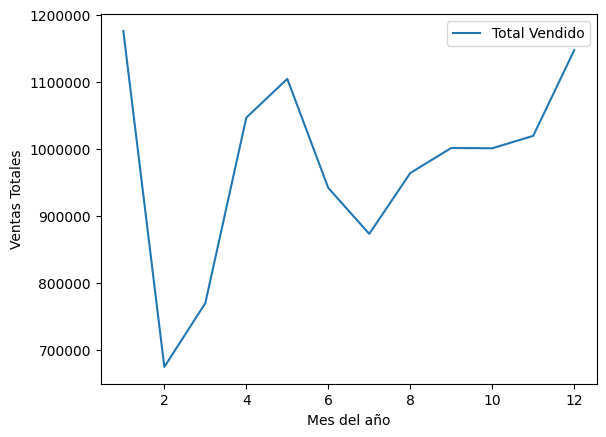

In [4]:
#se muestra la grafica
agrupados.plot()

# Aplicar el formateador al eje X
plt.gca().yaxis.set_major_formatter(formatter)
plt.ylabel("Ventas Totales")
plt.xlabel("Mes del año")
plt.show()

Ahora aplicaremos varios filtros para poder determinar cual fue el vendedor con más ventas en todo el año

In [6]:
#filtramos las columnas: vendedor, total vendido y mes
filtradosporvendedor = dataframe.filter(['Vendedor', 'Total Vendido', 'mes'])

#primero agrupamos por vendedor para ver quien tiene mas ventas
agrupados_por_vendedor = filtradosporvendedor.groupby(by='Vendedor').sum(True)
filtro_vendedor = agrupados_por_vendedor.sort_values(by=['Total Vendido','Vendedor'], ascending=False).iloc[0:1,0:]
vendedor_top = filtro_vendedor.axes[0].values[0]
print('El vendedor con más ventas en el año es: ',vendedor_top)

El vendedor con más ventas en el año es:  Vendedor 2


Ya que tenemos al vendedor con más ventas, lo filtramos solo para ese vendedor y solo inlcuimos mes y total vendido

In [7]:
filtradosporvendedor_pormes = filtradosporvendedor[filtradosporvendedor['Vendedor'] == vendedor_top].filter(['mes','Total Vendido'])

#agrupamos por mes para graficar
agrupados_por_vendedor_por_mes = filtradosporvendedor_pormes.groupby(by='mes').sum(True)
print(agrupados_por_vendedor_por_mes)

     Total Vendido
mes               
1        419757.63
2        349417.02
3        269915.45
4        322814.39
5        340107.25
6        202070.77
7        332992.49
8        331409.97
9        423251.03
10       294824.15
11       376683.95
12       433241.32


Gráficamos los resultados

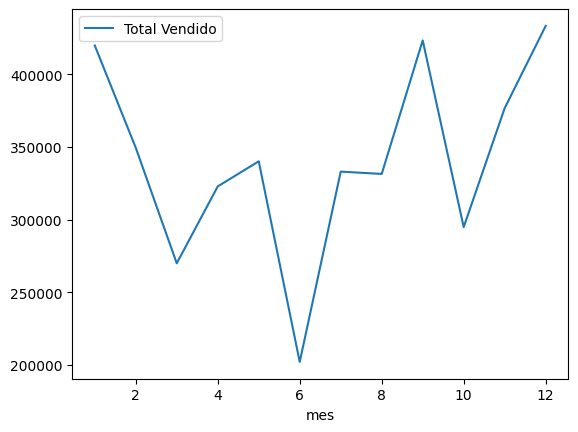

In [8]:
#se muestra la grafica
agrupados_por_vendedor_por_mes.plot()
plt.show()

Con el siguiente código resolvemos el punto 3, al separar por mes las ventas y creando un archivo excel para cada uno de estos

In [ ]:
for i in range(1, 13):
    #se filtra lo del mes i
    filtro_por_mes = dataframe[dataframe['mes'] == i]
    #sacamos el nombre del mes
    month_name = filtro_por_mes.head(1)['Día'].dt.month_name()
    month = month_name.values[0]
    #lo mandamos a un excel ya filtrado (recuerda cambiar la carpeta contenedora)
    filename_month = 'c:\\programaspython\\' + month + '.xlsx'
    filtro_por_mes.to_excel(filename_month,sheet_name=month)